<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Andrés Ramírez Villanueva, Juan Pablo Rodríguez Alonso y Santiago Romero Riggen.

**Fecha:** 25 de Junio del 2021.

**Expediente** : if726061, if715180 y if715099.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [GitHub](https://github.com/JuanPrdz/Proyecto_tema2_JPRodriguez_ARamirez_SRomero)

#  Proyecto simulación Pokémon - Predicción Bulbasaur
<p align="center"> <img width="600" height="200" src="https://media.redadn.es/imagenes/dswii_90124.jpg"> </p>


___
## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Predicción victoria Bulbasaur.

> Utilizaremos los datos reales de las características de combate ⚔ de los Pokémon para poder sacar las probabilidades de una posible victoria de BuBulbasaur al encontrarse un Pokémon en el mapa de forma aleatoria 🔀. Son más de 700s Pokémon a los que Bulbasaur se podría enfrentar en el pueblo Paleta por lo que un estudio estadístico es de gran utilidad para saber nuestras probabilidades, incluso se puede tomar en cuenta este análisis en un escenario donde el usuario asiste a un torneo y desea saber si puede o no ganar.

### 1.2 Objetivos.

> #### 1.1 Objetivo general.
> - Obtener las probabilidades de éxito de Bulbasaur en un combate cara a cara con cualquier Pokémon aleatorio que se le pueda poner en frente durante el juego.

> #### 1.2 Objetivos específicos
   > - Encontrar la probabilidad de que nos aparezca un Pokémon con menor ataque, defensa, ataque especial y velocidad que nuestro Bulbasaur.
   > - Identiifcar las tendencias de nuestros nodos por estudiar.      
   > - Darle una ponderación a los nodos para saber que es lo más importante a mejorar para meter al gimnasio a nuestro Bulbasaur.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Cuando estás jugando Pokémon y seleccionas a tu personaje favorito, en este caso Bulbasaur, queremos saber que tan difícil sería ganar en caso de enfrentarnos a cualquier Pokémon de manera aleatoria conociendo los más de 700s Pokémon y sus atributos. 


### 1.4 Nodos y variables que se decidieron simular y porqué
Tomaremos cuatro variables que nos parece son importantes a simular pues nos pueden dar una buena idea de lo que deberíamos cambiar en el entrenemiento o en su defecto en una apuesta, estas variables o "nodos" son:

- **Fuerza de ataque**: El ataque, en las estadísticas de un Pokémon, representa la fuerza natural del Pokémon al realizar un movimiento físico, se consideran físicos donde el Pokémon cause un daño al hacer contacto con otro Pokémon o en el que requiera usar fuerza física.

- **Fuerza de defensa**: La defensa, representa la resistencia natural de un Pokémon ante los movimientos físicos. Al igual que el ataque, puede ser incrementada o disminuida en combate por el uso de ciertos movimientos, habilidades y objetos.

- **Ataque especial**: El ataque especial, representa la fuerza con la que un Pokémon realiza un movimiento especial, éstos son movimientos en los que se realiza un ataque a distancia, o uno en el que se libera energía del Pokémon. Los ataques especiales se miden con el ataque especial de nuestro Pokémon y la defensa especial de nuestro rival.

- **Velocidad**: Velocidad es la propiedad del Pokémon de atacar, antes o después, que el oponente. A la hora de atacar el Pokémon con un mayor valor de velocidad, por lo general, siempre atacará primero. 

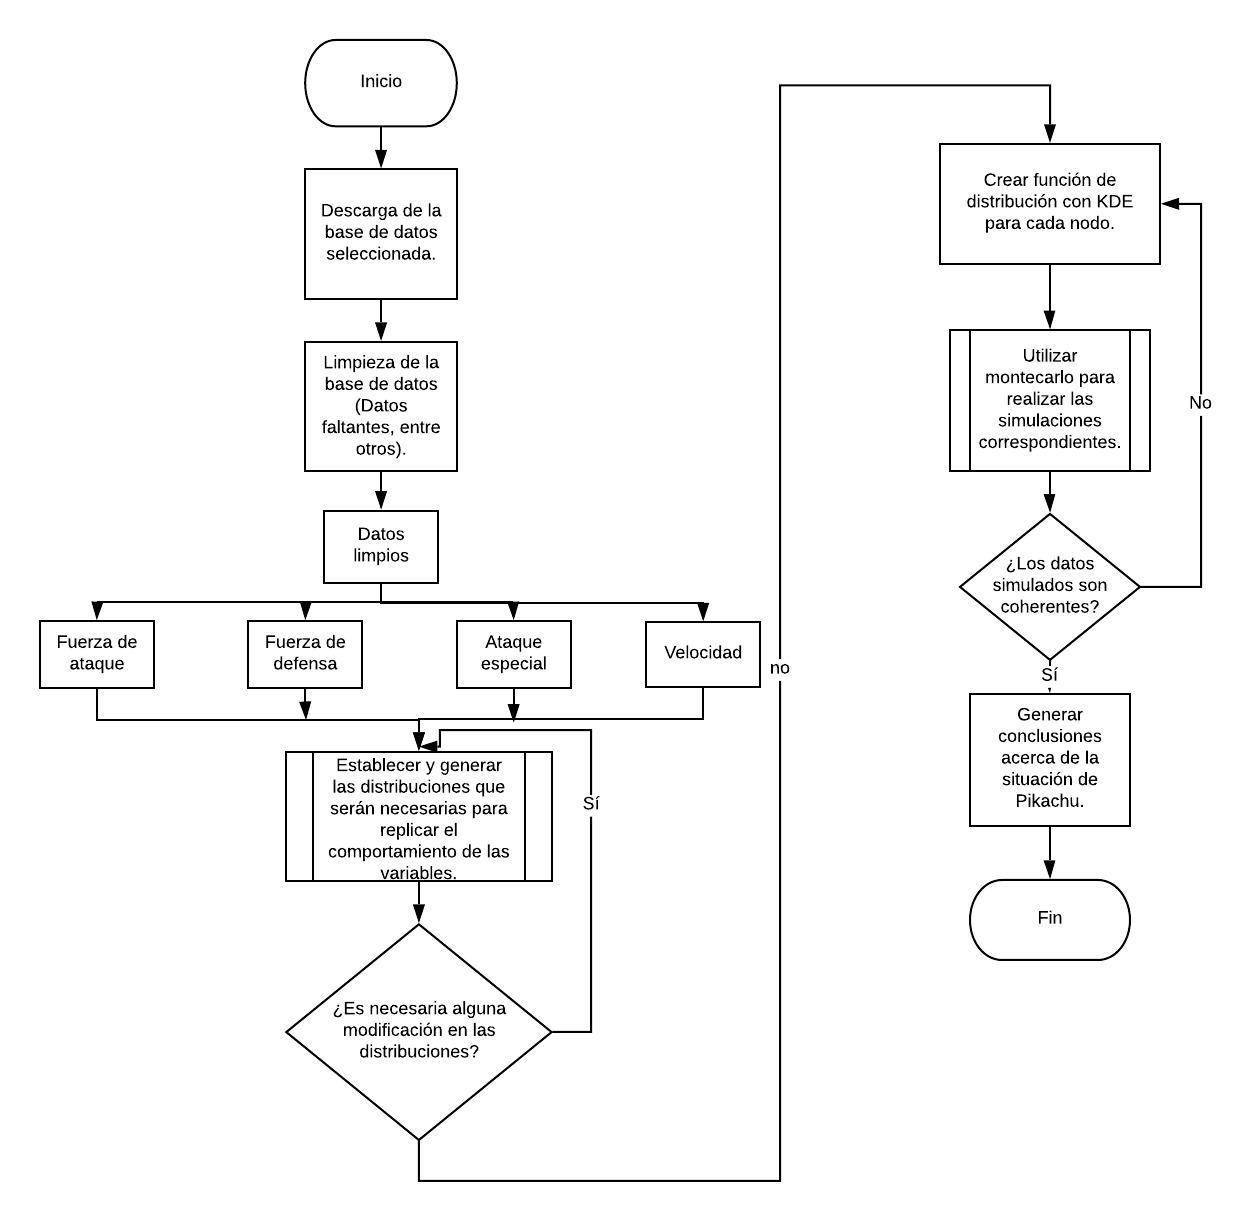


### 1.5 Definición de hipótesis y supuestos.

**Supuestos**

- Los Pokémon pueden aparecer de manera aleatoria independientemente al rival que se enfrenten.
- También se considera que no han evolucionado y que todos están en su estado inicial.

**Hipótesis**

- Bulbasaur tendrá una velocidad mayor a la media de los Pokémon.
- Nuestro Pokémon tendrá una defensa myor a la media de los demás.
- También tendrá un ataque especial mayor a la media de los demás.
- Tendrá una fuerza de ataque mayor a la media de los demás.


### 1.6 Obtención de bases de datos
> Se obtuvo la base de datos de la plataforma kaggle que ofrece una alta gama de datasets. Este dataset de Pokémon incluye variables como el ataque, defensa, velocidad, tipo, etc. Nosostros optamos por escoger las más significativas según recomendaciones de jugadores de Pokémon, a continuación el enlace a la página [Kaggle](https://www.kaggle.com/abcsds/pokemon).

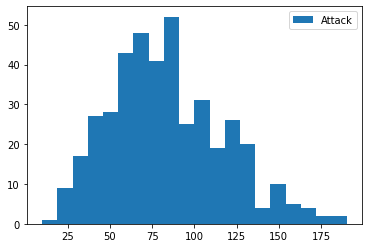

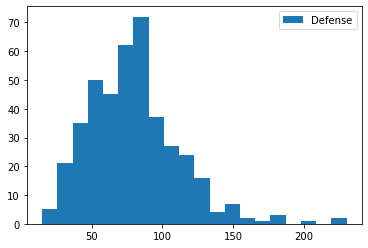

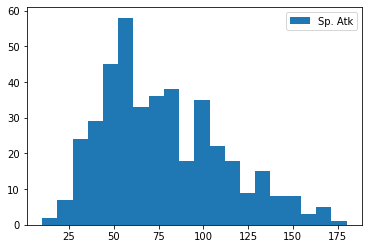

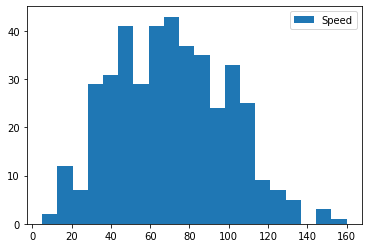

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import scipy.stats as st
import statsmodels.api as sm 
# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Pokemon.csv').dropna()

nodos=['Attack','Defense','Sp. Atk','Speed']


for i in range(4):
    plt.hist(data[nodos[i]],bins=20,label=nodos[i])
    plt.legend()
    plt.show()
data.head()

In [2]:
data1 = data["Name"] == "Bulbasaur"
Bulbasaur = data[data1]
Bulbasaur

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


### 1.7 Visualización de resultados de simulación.
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.8 Conclusiones.
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.9 Referencias.
> Citar (en formato APA) la bibliografía utilizada.

In [9]:
# Funciones a utilizar en el proyecto

def kde_sklearn(x, x_grid, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


def generador_vad(proba_acum: 'Probabilidad acumulada', indices: 'Valores por generar', N: 'Aleatorios por generar'):
    diccionario = {i: idx for i, idx in enumerate(indices)}
    U = np.random.rand(N)
    y = pd.Series([sum([1 for p in proba_acum if p < ui]) for ui in U]).map(diccionario)
    return y


def kde_sklearn_mod(x, bandwidth, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    pdf = lambda x_grid: np.exp(kde_skl.score_samples(x_grid[:, np.newaxis])) if isinstance(x_grid, np.ndarray) else \
        np.exp(kde_skl.score_samples(np.array[x_grid])[:, np.newaxis])
    return pdf


def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 


# Función de diagrama de caja y bigotes, y su histograma
def caja(nodo:"Nodo a usar", bin:"Bins a utilizar"):
    '''
    Esta función te arroja el diagrama de caja y bigotes, además de 
    un histograma del nodo a estudiar, ingresando el nodo a 
    estudiar y el número de bins.
    '''
    fig,(ax1,ax2) = plt.subplots(2,1,sharex= True,figsize=(8,8))
    ax1.boxplot(ataque,vert=False)
    ax2.hist(ataque,bins = bin) 
    plt.show()
    

# Función que hace las pruebas para ver una distribución que se ajuste mejor al nodo    
def prueba_dist(nodo: "Nodo a estudiar"):
    '''
    Esta función de devuelve que una gráfica en donde se ve como le quedan distintas distribuciones
    arbitrarias al nodo que el usuario debe ingresar a estudiar, además del orden de menor a menor
    de las distribuciones que se podrán usar más adelante.
    '''
    d_continuas = [d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))]

    y, x, _ = plt.hist(nodo, bins=20, density=True)
    x = x[1:]

    error = pd.DataFrame(columns = ["distribución", "error"])
    i = 0

    for d in d_continuas[10:20]:
        try:
            params = getattr(st, d).fit(nodo)
            y_hat = getattr(st, d)(*params).pdf(x)
            error.loc[i, :] = [d, np.mean(np.abs((y - y_hat)/y))] #Error MAPE
            plt.plot(x, y_hat, label = d)
            i += 1
        except:
            pass
    plt.legend()
    plt.show()

    error.set_index("distribución", inplace=True)
    print(error.sort_values("error"))   
    

# Función que hace la prueba Q_Q y nos muestra la gráfica.    
def q_q(nodo: "Nodo a simular", distr:"Distribución a comparar"):
    '''
    Esta función te arroja como se acomoda la distribución elegida (como entrada),
    del nodo introducido.
    '''
    # Histograma de las variables creadas
    divisiones = 20 # Cantidad de barras en el histograma
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(nodo, divisiones, density=True, label='Histograma mediciones')

    # Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
    # RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
    dist = distr
    params = getattr(st, dist).fit(nodo)

    # Graficar PDF de la distribución que queremos probar

    # x = np.arange(measurements.min(), measurements.max(), .01)
    y_hat = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probability')
    ax[0].grid()

    grap1 = sm.qqplot(ataque, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
    ax[1].grid()
    ax[1].set_title('Usando paquete stats')    
    
# Asignación de variables para los nodos
ataque = np.array(data['Attack'])
defensa = np.array(data["Defense"])
esp_atack = np.array(data["Sp. Atk"])
velocidad = np.array(data["Speed"])

# Nodo 1: Fuerza de ataque

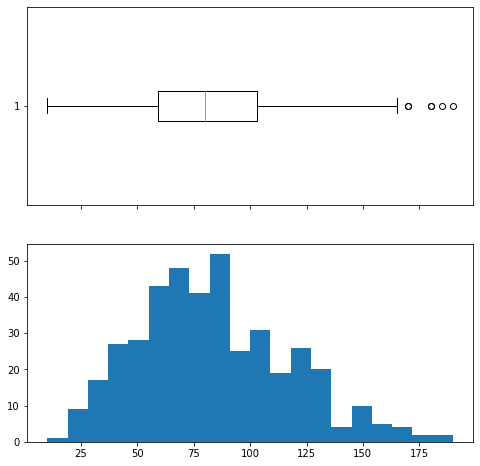

In [11]:
# Aquí hacemos un diagrama de caja y bigotes sobre el ataque, visualizando los quartiles y la media,
    
caja(ataque, 20)

Analizando el histograma, podemos observar que su distribución es similar a la betaprime (después de haber visto múltiples distribuciones para poder encontrar alguna lo más similar posible). Entonces, podremos ver a continuación si es verdad que es similar a la betaprime o no, con la prube a de hipótesis y la chi cuadrada.

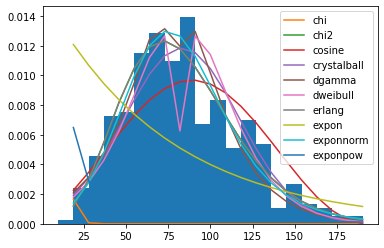

                 error
distribución          
chi2          0.446375
erlang        0.446375
exponnorm      0.45518
dweibull      0.616091
dgamma        0.637153
crystalball   0.650987
cosine        0.757436
chi           1.206636
exponpow      1.967808
expon         2.899548


In [8]:
# Probamos como se le ajustan distintas distribuciones
    
prueba_dist(ataque)    

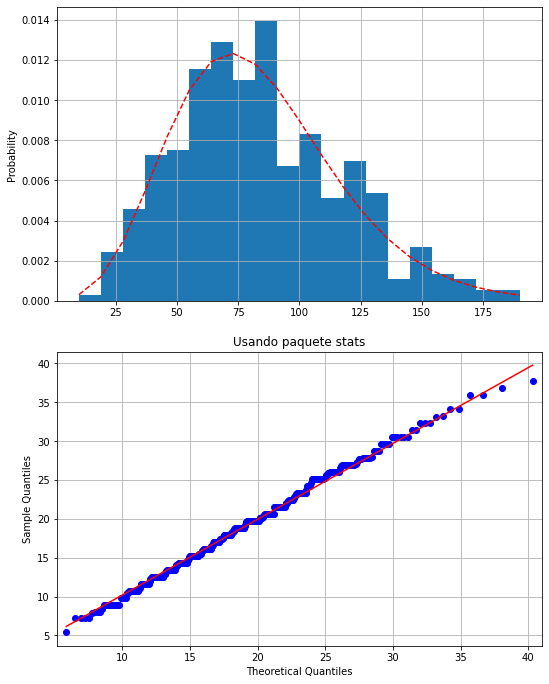

In [6]:
# Hacemos la prueba de q_q para la función de distribución que tenga menos error.
q_q(ataque, "chi2")

Observando la prueba de Quartil Quartil, se puede ver como en efecto, la distribución _chi2_ se ajusta bastante bien a los datos, ya que los puntos se acoplan casi perfectamente a la línea. Y claro, visualmente no es difícil observar que están muy similares.

### CHI2

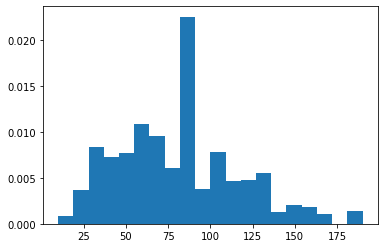

media mu =80.542800, desviación estándar muestral =35.986944
83.17391304347827 33.65775022767526


In [24]:
# Reducción de varianza y Montecarlo
N=10000

f_1=kde_sklearn_mod(ataque, 5)
proba = f_1(np.arange(0,191,.4))
f_acum = proba.cumsum()

# Utilizamos el método estratificado
u = muestreo_est(N)
funcion2 = lambda u: (generador_vad(f_acum, ataque, N))
o=funcion2(u).values

J = 20  # Cantidad de particiones del histograma

y, x, _ = plt.hist(o, J, density=True)
plt.show()

# Se obvia el último valor de x para obtener exactamente J muestras de x
x = x[:-1] 

# Media y desviación estándar muestral
mu = np.mean(o)
sigma = np.std(o)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))
print(ataque.mean(), ataque.std())

Observamos que la media y desviación estándar son similares a las reales, por lo que continuamos con el proceso...

In [25]:
# Nombramos la distribución y realizamos la prueba de chi2, prueba de hipótesis de que la distribución
# es chi2

dist = "chi2"
pi = getattr(st, dist).pdf(x, *getattr(st, dist).fit(o))

# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = len(getattr(st, dist).fit(o)) # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  8.527561453947788
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8.527561453947788, pvalue=0.9805301997701585)
Estadístico de chi_cuadrado =  26.29622760486423
Media muestral =  80.5428 
Desviación estándar muestral =  35.98694441266166


Entonces, nuestra hipótesis nula se acepta, en el que nuestros datos se distribuyen con una distribución de Chi2.

In [33]:
# Otra prueba de hipótesis, con la media simulando a que es 83

media = ataque.mean()
sd = ataque.std()
N = len(ataque)

# Nivel de confianza
confianza = 0.95

# Datos reales
X = ataque

# Hipótesis nula
media2 = 83

# Realizamos la prueba de hipótesis para H0= mu=media2
ho = st.ttest_1samp(X, media2)
print('La prueba de hipótesis arroja como resultado\n',ho)

# Calculamos el estadístico normalizado
t = (np.mean(X) - media2)/(np.std(X) / np.sqrt(N))
print('Cálculo del estadístico de prueba teórico=', t)

# Cálculo de la región de rechazo
confianza_ph = 0.05
cuantil = st.t(N-1).cdf(1-confianza_ph/2)
print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')

La prueba de hipótesis arroja como resultado
 Ttest_1sampResult(statistic=0.1050079301223422, pvalue=0.9164204947327985)
Cálculo del estadístico de prueba teórico= 0.10513498150592315
Región de rechazo = (t<-0.8349345092404805) U (t>0.8349345092404805)


Se acepta pues el valor de la _p_ entra en el intervalo de aceptación y siempre hay que recordar que _p_ grande no se rechaza

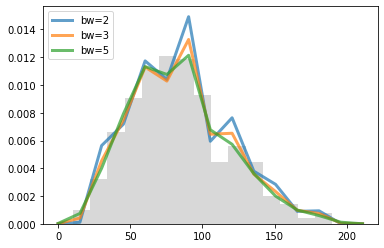

In [34]:
# KDE: Estimar el bandwith correcto con una función para optimizar el proceso

fig, ax = plt.subplots()
for bandwidth in [2,3,5]:
    ax.plot(np.linspace(0,211,15), kde_sklearn(ataque, np.linspace(0,211,15), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(ataque, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

Aquí observamos que el 

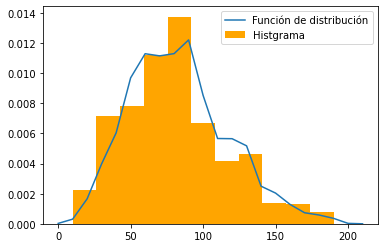

In [35]:
# Comparamos el histograma de "o" (10000 simulaciones del ataque, en función de su distribución de probabilidad)
plt.hist(o, bins=11, density = True, color = 'orange',label='Histgrama')
plt.plot(np.arange(0,211,10),f_1(np.arange(0,211,10)),label='Función de distribución')
plt.legend()
plt.show()

In [36]:
# Nivel de confianza, y su intérvalo.

# Parámetros de los datos reales
confianza = .95
media = ataque.mean()
sd = ataque.std()

# Intervalo de confianza usando t-student
i1 = st.t.interval(confianza, len(ataque)-1, loc=np.mean(ataque), scale=st.sem(ataque))

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print('Media calculada' ,np.mean(ataque))

o.mean()

Con una confianza de 0.95 la media estará en el intervalo t,
 (79.9183004282012, 86.42952565875532)
Media calculada 83.17391304347827


80.7574

In [37]:
# Probabilidad de que aparezca un Pokémon con menor ataque que el de Bulbasaur
ganar_ataque = len(list(filter(lambda x: x<Bulbasaur["Attack"].values, o)))/len(o)
ganar_ataque

0.1778

**Conclusión nodo 1**

Por medio de la distribución que hemos sacado por medio de las herramientas que nos parecieron útiles observamos que la media calculada a através de Montecarlo está por encima de los 80 puntos de ataque, en un intérvalo con el 95% de confianza entre el 79.91 y 83.17 de ataque. Bulbasaur teniendo 49 de ataque, lo mejor será meterlo al gimnasio a mejorar ese atributo. La probabilidad de que nos salga un Pokemon menos fuerte que nosotros es de tan solo 0.18 aproximadamente, lo que condena en el ataque a nuestro Bulbasaur.

# ------------------------------------------------------------------------------------------------------------

# Nodo 2: Defensa

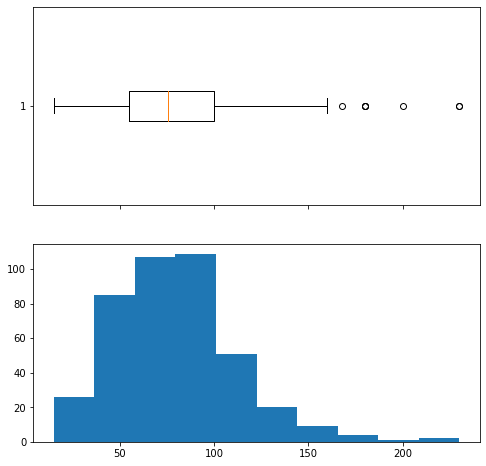

In [13]:
# Realizamos un diagrama de caja y bigotes sobre la defensa, visualizando los quartiles y la media
defensa = np.array(data['Defense'])
fig,(ax1,ax2) = plt.subplots(2,1,sharex = True,figsize = (8,8))
ax1.boxplot(defensa,vert = False)
ax2.hist(defensa,bins = 10) 
plt.show()

Text(0.5, 1.0, 'Usando paquete stats')

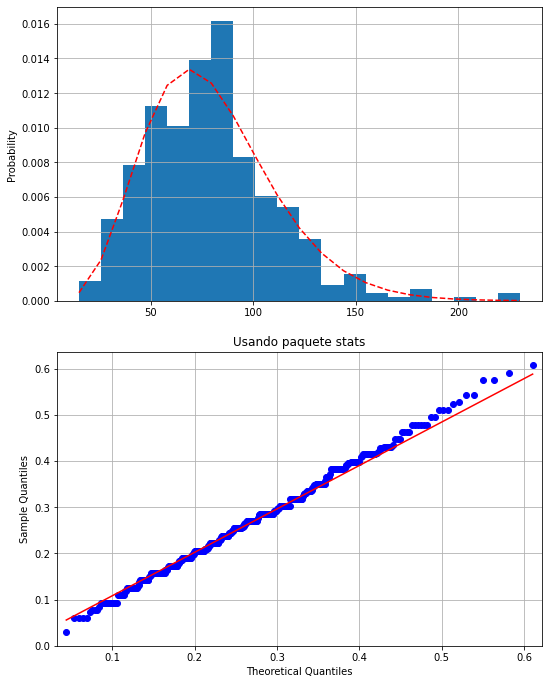

In [14]:
# Histograma de las variables creadas
divisiones = 20 # Cantidad de barras en el histograma
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(defensa, divisiones, density=True, label='Histograma mediciones')

# Función de distribución de probabilidad la cual creemos que mis datos distribuyen 
# RECORDAR: SÓLO FUNCIONA PARA DISTRIBUCIONES CONTINUAS
dist = 'beta'
params = getattr(st, dist).fit(defensa)

# Graficar PDF de la distribución que queremos probar

# x = np.arange(measurements.min(), measurements.max(), .01)
y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()


grap1 = sm.qqplot(ataque, dist=getattr(st, dist), line='q', fit=True, ax=ax[1])
ax[1].grid()
ax[1].set_title('Usando paquete stats')

In [15]:
# Calculamos la media, desviación estándar y N
media = defensa.mean()
sd = defensa.std()
N = len(defensa)

# Nivel de confianza
confianza = 0.95

# Datos reales
X = defensa

# Hipótesis nula
media2 = 80

# Realizamos la prueba de hipótesis para H0= mu=media2
ho = st.ttest_1samp(X, media2)
print('La prueba de hipótesis arroja como resultado:\n',ho)
print('')

# Calculamos el estadístico normalizado
t = (np.mean(X) - media2) / (np.std(X) / np.sqrt(N))
print('Cálculo del estadístico de prueba teórico = ', t)
print('')

# Cálculo de la región de rechazo
confianza_ph = 0.05
cuantil = st.t(N-1).cdf(1-confianza_ph / 2)
print(f'Región de rechazo = (t<{-cuantil}) U (t>{cuantil})')

La prueba de hipótesis arroja como resultado:
 Ttest_1sampResult(statistic=-0.20205508671530548, pvalue=0.8399731486564923)

Cálculo del estadístico de prueba teórico =  -0.20229955756904802

Región de rechazo = (t<-0.8349345092404805) U (t>0.8349345092404805)


Se acepta ya que el _p_ value está por fuera de la región de rechazo. Y pues _p_ grande no se debe rechazar

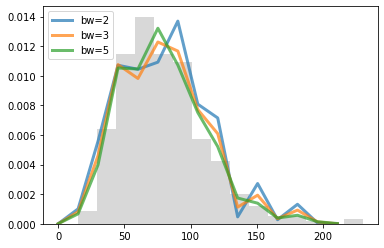

In [16]:
# KDE: estimar el bandwith correcto con una función para optimizar el proceso
fig, ax = plt.subplots()
for bandwidth in [2,3,5]:
    ax.plot(np.linspace(0,211,15), kde_sklearn(defensa, np.linspace(0,211,15), bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(defensa, 15, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')

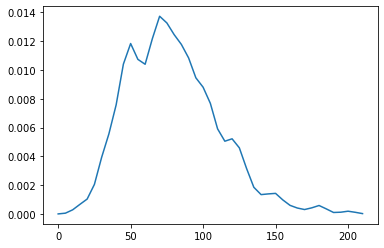

In [17]:
# Reducción de varianza y Montecarlo
N=10000

f_1 = kde_sklearn_mod(defensa, 5)
proba = f_1(np.arange(0,191,.4))
f_acum = proba.cumsum()

# Utilizamos el método estratificado
u = muestreo_est(N)
funcion2 = lambda u: (generador_vad(f_acum, defensa, N))
o = funcion2(u).values

plt.plot(np.arange(0,211,5),f_1(np.arange(0,211,5)))

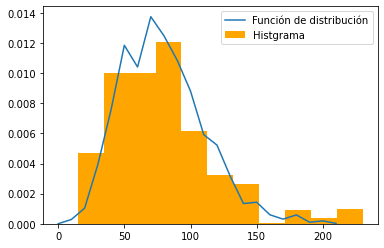

In [18]:
# Comparamos el histograma de "o" (10,000 simulaciones de la defensa, en función de su distribución de probabilidad)
plt.hist(o, bins=11, density = True, color = 'orange',label='Histgrama')
plt.plot(np.arange(0,211,10),f_1(np.arange(0,211,10)),label='Función de distribución')
plt.legend()
plt.show()

In [19]:
# Nivel de confianza, y su intérvalo.

# Parámetros de los datos reales
confianza = .95
media = defensa.mean()
sd = defensa.std()

# Intervalo de confianza usando t-student
i1 = st.t.interval(confianza, len(defensa)-1, loc = np.mean(defensa), scale = st.sem(defensa))

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s' %(confianza,i1))
print("")
print('Media calculada = ', np.mean(defensa))

o.mean()

Con una confianza de 0.95 la media estará en el intervalo t,
 (76.52743962938429, 82.82521737544663)

Media calculada =  79.67632850241546


79.8758

In [20]:
Bulbasaur

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


**Conclusión nodo 2** 

A través de la distribución que calculamos usando las herramientas que nos parecieron más útiles podemos ver que la media calculada por medio de Montecarlo está por encima de los 79 puntos de defensa, en un intérvalo con el 95% de confianza entre el 76.53 y 82.82 de ataque. Bulbasaur obteniendo un 49 de defensa, creemos que lo ideal sería también entrenarlo en este aspecto por la diferencia con la media.

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>